In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path, WindowsPath
import json

In [2]:
BASE_PATH = Path('E:/rl-search-data')
CHECKPOINTS_PATH = Path.joinpath(BASE_PATH, 'checkpoints/PPO/Pong-v0')
LOGS_PATH = Path.joinpath(BASE_PATH, 'logs/PPO/Pong-v0')

In [3]:
def parse_config(path: WindowsPath):
    config_text = path.joinpath('cnn_config').read_text().replace('-', '_')
    config_text = config_text.split('\n')[0]
    layers = config_text.split('&')
    layers = [l.split('_') for l in layers]

    def try_parse(v: str):
        try:
            return float(v)
        except:
            return str(v)

    layers = [try_parse(value) for sublist in layers for value in sublist]

    try:
        results_text = path.joinpath('results.json').read_text()
    except:
        return None

    results_json = json.loads(results_text)
    return [*layers, *results_json]

configs = CHECKPOINTS_PATH.glob('*')
configs = [parse_config(p) for p in configs]
configs = [p for p in configs if p != None]

In [4]:
df = pd.DataFrame(configs)
df.columns = [
    'L1Size', 'L1Kernel', 'L1Stride', 'L1Padding', 'L1Activation',
    'L2Size', 'L2Kernel', 'L2Stride', 'L2Padding', 'L2Activation',
    'L3Size', 'L3Kernel', 'L3Stride', 'L3Padding', 'L3Activation',
    'OutputSize',
    'RewardMean', 'RewardStd', 'TrainTime'
]
df['AdditiveSize'] = df['L1Size'] + df['L2Size'] + df['L3Size']
# MODEL SIZE MUST BE CALCULATED
# NEED TO FIGURE OUT TOTAL NUMBER OF WEIGHTS
df['MultiplicativeSize'] = df['L1Size']*df['L2Size'] + df['L2Size']*df['L3Size']
df = df.drop(['L1Padding', 'L2Padding', 'L3Padding'], axis=1)
df

,L1Size,L1Kernel,L1Stride,L1Activation,L2Size,L2Kernel,L2Stride,L2Activation,L3Size,L3Kernel,L3Stride,L3Activation,OutputSize,RewardMean,RewardStd,TrainTime,AdditiveSize,MultiplicativeSize
0,128.0,2.0,1.0,CELU,16.0,2.0,1.0,CELU,32.0,8.0,1.0,ReLU,8.0,-10.0,2.569047,5805.918762,176.0,2560.0
1,128.0,2.0,1.0,CELU,16.0,2.0,1.0,GELU,32.0,8.0,1.0,CELU,8.0,-11.4,3.979950,10815.752029,176.0,2560.0
2,128.0,2.0,1.0,CELU,16.0,2.0,1.0,GELU,32.0,8.0,1.0,ReLU,8.0,-12.4,3.746999,8111.018759,176.0,2560.0
3,128.0,2.0,1.0,CELU,16.0,2.0,1.0,GELU,8.0,1.0,1.0,CELU,8.0,-10.1,4.011234,5484.861976,152.0,2176.0
4,128.0,2.0,1.0,CELU,16.0,2.0,1.0,ReLU,32.0,8.0,1.0,CELU,8.0,-12.6,3.611094,4629.746017,176.0,2560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,8.0,2.0,1.0,ReLU,128.0,8.0,1.0,ReLU,8.0,2.0,1.0,ReLU,64.0,-11.1,3.858756,8190.878991,144.0,2048.0
365,8.0,2.0,1.0,ReLU,2.0,1.0,1.0,ReLU,32.0,8.0,1.0,CELU,8.0,-10.5,4.272002,5229.728890,42.0,80.0
366,8.0,2.0,1.0,ReLU,32.0,8.0,1.0,CELU,4.0,2.0,1.0,GELU,64.0,-9.7,6.165225,4710.036947,44.0,384.0
367,8.0,2.0,1.0,ReLU,4.0,2.0,1.0,ReLU,16.0,8.0,1.0,CELU,8.0,-11.2,3.655133,5043.168424,28.0,96.0


In [9]:
df.sort_values('RewardMean', ascending=False)

,L1Size,L1Kernel,L1Stride,L1Activation,L2Size,L2Kernel,L2Stride,L2Activation,L3Size,L3Kernel,L3Stride,L3Activation,OutputSize,RewardMean,RewardStd,TrainTime,AdditiveSize,MultiplicativeSize
17,128.0,2.0,1.0,GELU,16.0,2.0,1.0,ReLU,32.0,8.0,1.0,CELU,8.0,-3.0,5.272571,4059.070445,176.0,2560.0
353,64.0,8.0,1.0,CELU,128.0,4.0,1.0,CELU,2.0,2.0,1.0,CELU,512.0,-5.5,4.201190,3719.882485,194.0,8448.0
233,64.0,2.0,1.0,CELU,16.0,2.0,1.0,CELU,32.0,8.0,1.0,ReLU,8.0,-6.1,3.700000,5346.175093,112.0,1536.0
266,64.0,2.0,1.0,GELU,16.0,2.0,1.0,ReLU,32.0,4.0,1.0,GELU,16.0,-6.6,6.651316,4787.089509,112.0,1536.0
206,32.0,8.0,1.0,ReLU,32.0,2.0,1.0,CELU,4.0,1.0,1.0,ReLU,8.0,-7.1,4.229657,2786.576204,68.0,1152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,64.0,4.0,1.0,CELU,2.0,1.0,1.0,ReLU,2.0,2.0,1.0,ReLU,16.0,-21.0,0.000000,7725.776965,68.0,132.0
256,64.0,2.0,1.0,CELU,64.0,16.0,1.0,CELU,32.0,4.0,1.0,ReLU,256.0,-21.0,0.000000,10824.093254,160.0,6144.0
240,64.0,2.0,1.0,CELU,16.0,2.0,1.0,ReLU,4.0,2.0,1.0,ReLU,8.0,-21.0,0.000000,8439.257207,84.0,1088.0
229,64.0,2.0,1.0,CELU,128.0,32.0,1.0,CELU,32.0,4.0,1.0,ReLU,8.0,-21.0,0.000000,10814.653738,224.0,12288.0


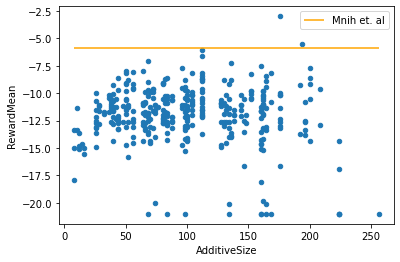

In [6]:
ax = df.plot(x='AdditiveSize', y='RewardMean', kind='scatter')
ax.hlines(-5.9, xmin=df.min()['AdditiveSize'], xmax=df.max()['AdditiveSize'], colors=['orange'], label='Mnih et. al')
ax.legend()

C:\ProgramData\Anaconda3\envs\rl-search2\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


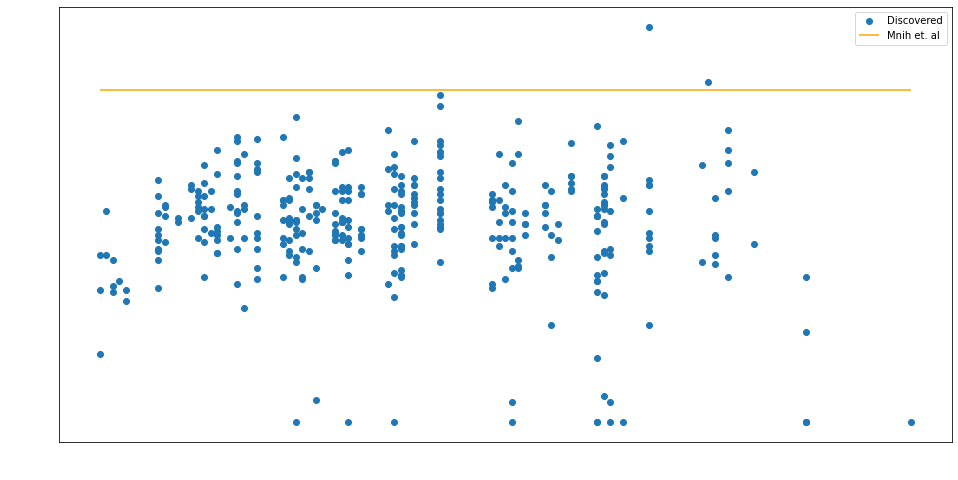

In [7]:
FIGURE_SIZE = (16, 8)
fig = plt.figure(figsize=FIGURE_SIZE)
ax = plt.axes()
ax.scatter(df['AdditiveSize'], df['RewardMean'], label='Discovered')
ax.hlines(-5.9, xmin=df.min()['AdditiveSize'], xmax=df.max()['AdditiveSize'], colors=['orange'], label='Mnih et. al')
ax.set_xlabel('Model Size')
ax.set_ylabel('Mean Reward')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.legend()
fig.savefig('D://Graph Data/@export/Pong - Cumulative Size vs. Performance.png', bbox_inches='tight')
fig.show()